## Stochastic gradient descent 

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./data/Fish.csv")

In [3]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
x = df.drop(["Species", "Length1"], axis=1)
y = df["Species"]

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.25, random_state=12)

In [10]:
ss = StandardScaler()
scaled_train = ss.fit_transform(x_train)
scaled_test = ss.transform(x_test)

In [11]:
sgd = SGDClassifier(loss = "log_loss", max_iter=10, random_state=13)

- SGDClassifier Paramaeters
    - loss: type of loss function 
    - max-iter: max epoch

In [12]:
sgd.fit(scaled_train, y_train)
print(sgd.score(scaled_train, y_train))
print(sgd.score(scaled_test, y_test))

0.6050420168067226
0.775


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


convergence warning -> model has not been sufficiently trained

In [13]:
sgd.partial_fit(scaled_train, y_train)
print(sgd.score(scaled_train, y_train))
print(sgd.score(scaled_test, y_test))

0.7310924369747899
0.8


## Epochs and Overfitting

- too little epochs will end up in model not having sufficient training -> underfitting
- too many epochs will end up in model overfitting
- score for training data will contiuously increase, but score for testing data will decrease eventually 
    - moment score of testing data decreases -> overfitting
    - stopping before overfitting -> "early stopping"

In [14]:
sgd = SGDClassifier(loss="log_loss", random_state=13)
train_score = []
test_score = []
classes = np.unique(y_train)

In [15]:
for _ in range(300):
    sgd.partial_fit(scaled_train, y_train, classes = classes)
    train_score.append(sgd.score(scaled_train, y_train))
    test_score.append(sgd.score(scaled_test, y_test))

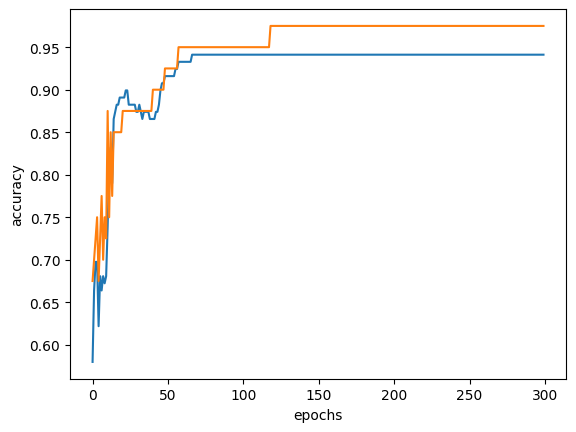

In [17]:
plt.figure()
plt.plot(train_score)
plt.plot(test_score)

plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()

In [18]:
sg = SGDClassifier(loss = "log_loss", max_iter = 300, tol = None, random_state=13)
sgd.fit(scaled_train, y_train)
print(sgd.score(scaled_train, y_train))
print(sgd.score(scaled_test, y_test))

0.8319327731092437
0.875


- SGDClassifer stops training if performance doesn't improve after a certain epoch count
    - tol parameter -> specifies the min performace 
    - if tol is none, training never stops until max_iter is reached